In [9]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

raw_data = json.load(open('./data/championFull.json'))['data']

data = []
columns = ['id', 'primary', 'secondary']

for index, (key, champion) in enumerate(raw_data.items()):
    champion_data = [champion['id']]
    
    for name in champion['tags']:
        champion_data.append(name)
        
    if len(champion['tags']) < 2:
        champion_data.append('')
        
    for name, stat in champion['stats'].items():
        # Get all the column names on the first champion only.
        if index == 1:
            columns.append(name)

        champion_data.append(stat)
        
    data.append(champion_data)
    
df = pd.DataFrame(data, columns=columns)
# Rename to the more modern name for magic resist.
df.rename(columns={'spellblock': 'mr', 'spellblockperlevel': 'mrperlevel'}, inplace=True)
# For now these are always 0
df.drop(columns=['crit', 'critperlevel'])

,id,primary,secondary,hp,hpperlevel,mp,mpperlevel,movespeed,armor,armorperlevel,...,mrperlevel,attackrange,hpregen,hpregenperlevel,mpregen,mpregenperlevel,attackdamage,attackdamageperlevel,attackspeedperlevel,attackspeed
0,Aatrox,Fighter,Tank,580.00,90.0,0.0,0.0,345,38.000,3.25,...,1.25,175,3.0,1.00,0.000,0.000,60.0000,5.00,2.500,0.651
1,Ahri,Mage,Assassin,526.00,92.0,418.0,25.0,330,20.880,3.50,...,0.50,550,6.5,0.60,8.000,0.800,53.0400,3.00,2.000,0.668
2,Akali,Assassin,,575.00,95.0,200.0,0.0,345,23.000,3.50,...,1.25,125,8.0,0.50,50.000,0.000,62.4000,3.30,3.200,0.625
3,Alistar,Tank,Support,573.36,106.0,350.0,40.0,330,44.000,3.50,...,1.25,125,8.5,0.85,8.500,0.800,61.1116,3.62,2.125,0.625
4,Amumu,Tank,Mage,613.12,84.0,287.2,40.0,335,33.000,3.80,...,1.25,125,9.0,0.85,7.382,0.525,53.3800,3.80,2.180,0.736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,Zed,Assassin,,584.00,85.0,200.0,0.0,345,32.000,3.50,...,1.25,125,7.0,0.65,50.000,0.000,63.0000,3.40,3.300,0.651
141,Ziggs,Mage,,536.00,92.0,480.0,23.5,325,21.544,3.30,...,0.50,550,6.5,0.60,8.000,0.800,54.2080,3.10,2.000,0.656
142,Zilean,Support,Mage,504.00,82.0,452.0,30.0,335,24.000,3.80,...,0.50,550,5.5,0.50,11.335,0.800,51.6400,3.00,2.130,0.625
143,Zoe,Mage,Support,560.00,92.0,425.0,25.0,340,20.800,3.50,...,0.50,550,6.5,0.60,8.000,0.650,58.0000,3.30,2.500,0.625


In [10]:
df.describe()

,hp,hpperlevel,mp,mpperlevel,movespeed,armor,armorperlevel,mr,mrperlevel,attackrange,hpregen,hpregenperlevel,mpregen,mpregenperlevel,crit,critperlevel,attackdamage,attackdamageperlevel,attackspeedperlevel,attackspeed
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.00000,145.000000,145.000000,145.000000,145.0,145.0,145.000000,145.000000,145.00000,145.000000
mean,556.141793,88.567241,308.814483,32.868966,336.400000,30.073159,3.467586,31.154483,0.896897,320.551724,6.62931,0.666552,8.412986,0.558103,0.0,0.0,59.402231,3.257494,2.45329,0.646786
std,37.482164,6.600403,115.804259,16.707244,7.575912,6.826577,0.478588,1.582850,0.378558,195.920297,1.73858,0.161488,8.383170,0.281426,0.0,0.0,6.187004,0.588240,0.82232,0.034982
min,340.000000,65.000000,0.000000,0.000000,315.000000,17.040000,0.000000,25.000000,0.300000,125.000000,2.50000,0.400000,0.000000,0.000000,0.0,0.0,40.368000,1.500000,0.00000,0.475000
25%,534.000000,85.000000,277.200000,25.000000,330.000000,24.300000,3.250000,30.000000,0.500000,125.000000,5.50000,0.550000,6.972000,0.450000,0.0,0.0,55.000000,3.000000,2.00000,0.625000
50%,564.480000,89.000000,324.000000,38.000000,335.000000,30.000000,3.500000,32.000000,1.250000,175.000000,7.00000,0.600000,7.590000,0.650000,0.0,0.0,60.000000,3.200000,2.50000,0.638000
75%,582.240000,92.000000,375.000000,43.000000,340.000000,35.000000,3.750000,32.100000,1.250000,525.000000,8.00000,0.750000,8.010000,0.800000,0.0,0.0,64.000000,3.500000,3.00000,0.658000
max,625.640000,112.000000,500.000000,67.000000,355.000000,47.000000,5.000000,39.000000,1.500000,650.000000,10.00000,1.750000,50.000000,1.000000,0.0,0.0,70.000000,5.000000,6.00000,0.800000


In [11]:
df['primary'].value_counts()

Fighter     40
Mage        33
Marksman    22
Tank        19
Assassin    16
Support     15
Name: primary, dtype: int64

In [12]:
df['secondary'].value_counts()

            35
Mage        25
Tank        23
Fighter     23
Assassin    20
Support     16
Marksman     3
Name: secondary, dtype: int64

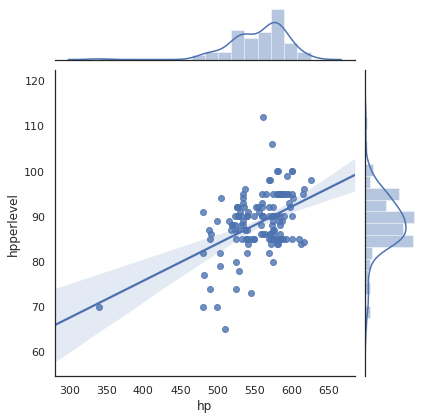

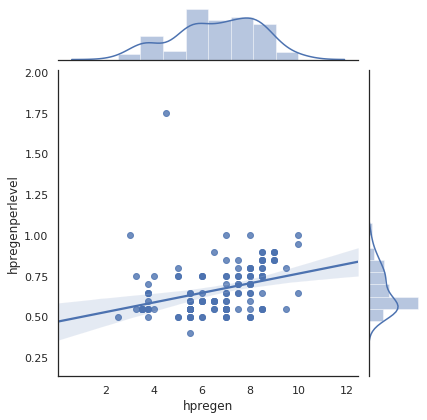

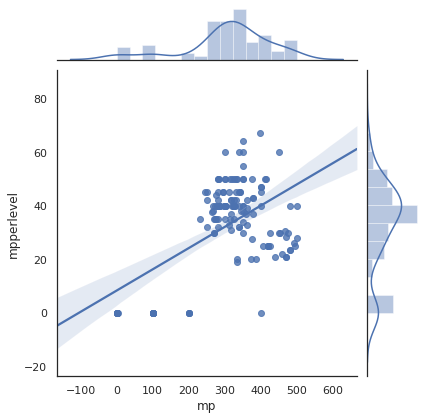

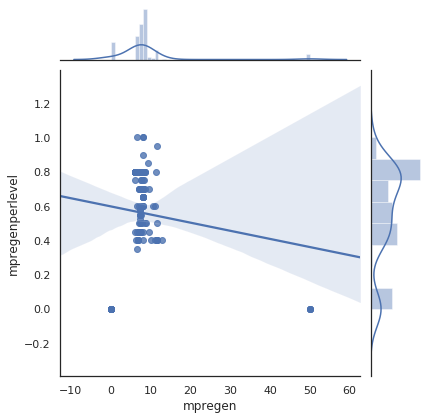

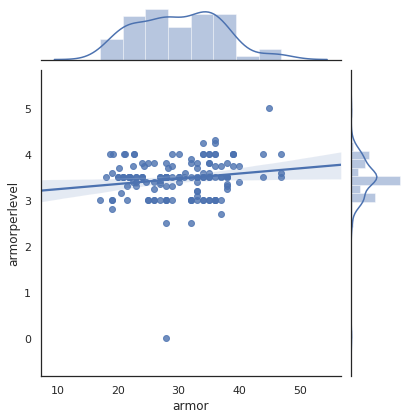

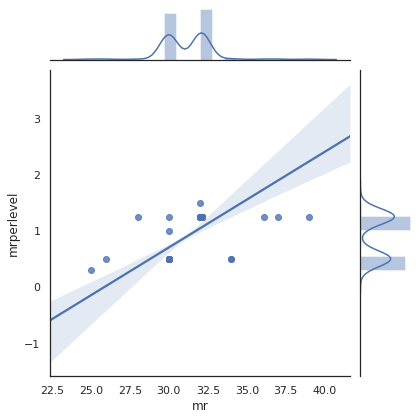

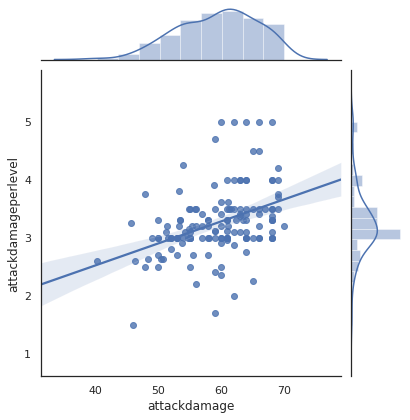

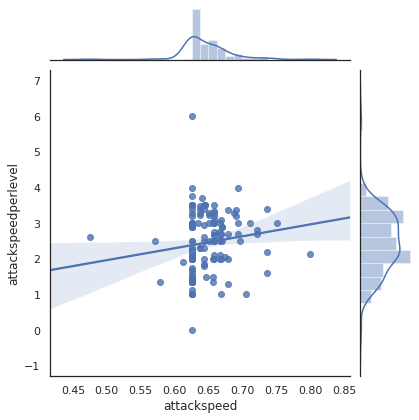

In [15]:
pairs = [('hp', 'hpperlevel'), ('hpregen', 'hpregenperlevel'), ('mp', 'mpperlevel'), 
         ('mpregen','mpregenperlevel'), ('armor', 'armorperlevel'), ('mr', 'mrperlevel'),
        ('attackdamage', 'attackdamageperlevel'), ('attackspeed', 'attackspeedperlevel')]

for pair in pairs:
    sns.jointplot(pair[0], pair[1], data=df, kind="reg")

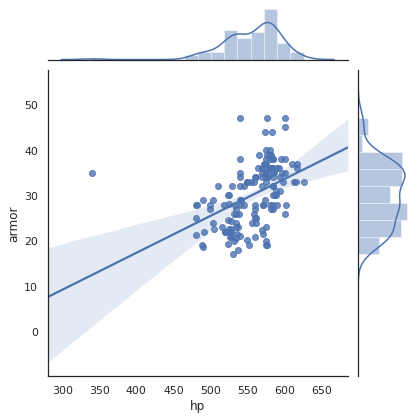

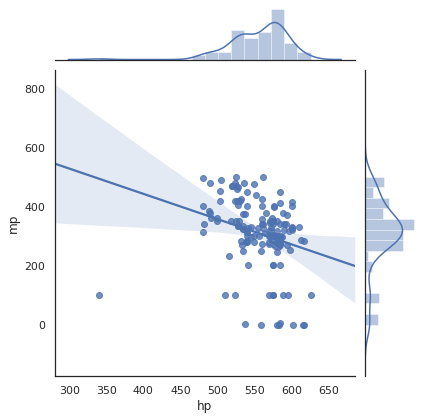

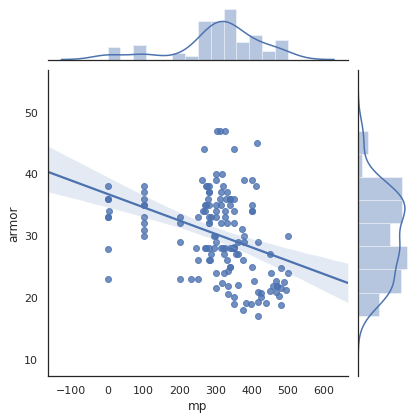

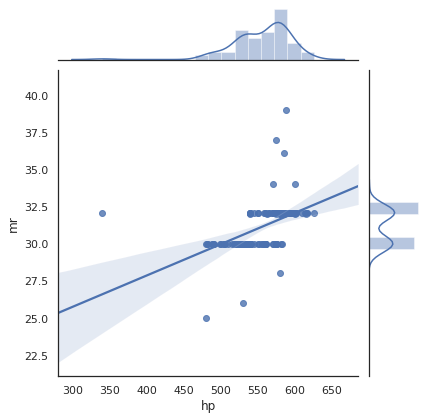

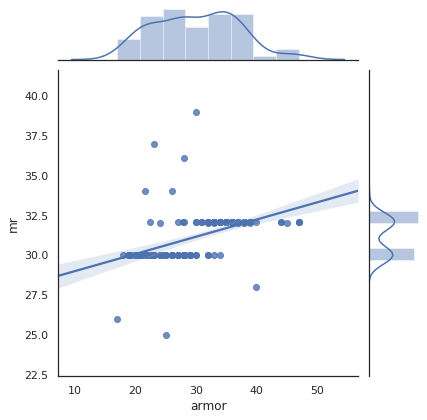

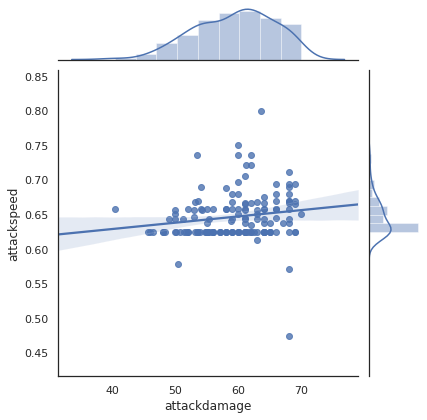

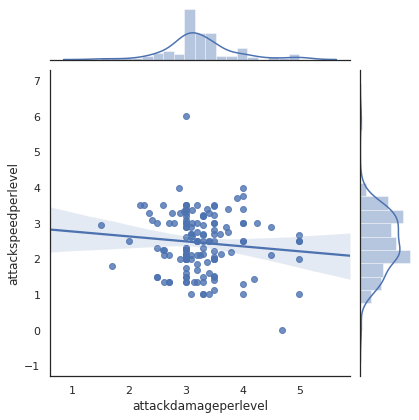

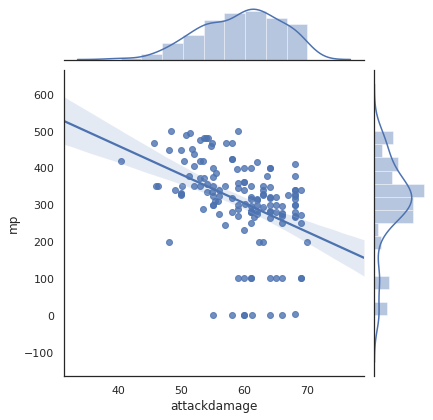

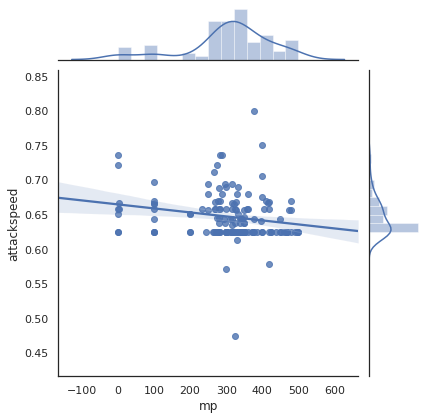

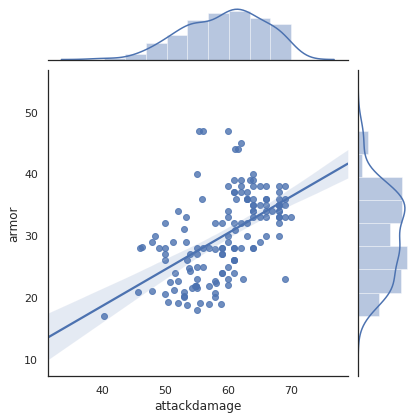

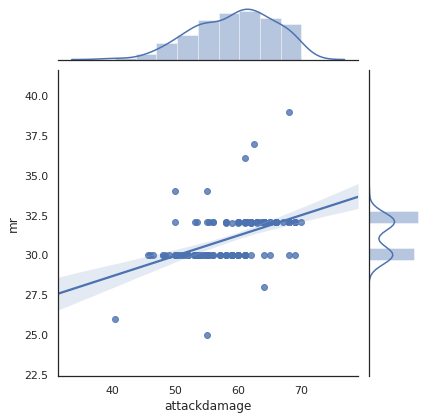

In [17]:
pairs = [('hp', 'armor'), ('hp', 'mp'), ('mp', 'armor'), ('hp', 'mr'), ('armor', 'mr'),
         ('attackdamage','attackspeed'), ('attackdamageperlevel', 'attackspeedperlevel'),
         ('attackdamage', 'mp'), ('mp', 'attackspeed'), ('attackdamage', 'armor'), ('attackdamage', 'mr')]

for pair in pairs:
    sns.jointplot(pair[0], pair[1], data=df, kind="reg")